# Final Portfolio Project: End-to-End Machine Learning
**Name:** Prajita Banjara  
**Student ID:** 2513644  
**Module:** 5CS037 Concepts and Technologies of AI

## Introduction
This portfolio implements machine learning tasks:
1. **Regression:** Predicting the demand for rented bikes in Seoul based on weather conditions.

In [ ]:
# --- CELL 1: Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn for Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression

# Sklearn Models
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Sklearn Metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

# Set style for plots
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

# Part 1: Regression Task (Seoul Bike Data)
**Goal:** Predict `Rented Bike Count` using features like Temperature, Humidity, and Hour.

### 1.1 Data Loading
Loading the dataset and cleaning column names to remove special characters.

In [ ]:
# --- CELL 2: Load Bike Data (Regression) ---
# Load dataset with specific encoding to handle special characters
df_bike = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

# Rename columns to remove special characters (like °C) and spaces
df_bike.columns = ['Date', 'RentedBikeCount', 'Hour', 'Temperature', 'Humidity',
                   'WindSpeed', 'Visibility', 'DewPointTemp', 'SolarRadiation',
                   'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'FunctioningDay']

# Display first few rows
print("Bike Data Loaded Successfully:")
display(df_bike.head())

Bike Data Loaded Successfully:


,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemp,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 1.2 Exploratory Data Analysis (EDA)
Visualizing the data to understand distributions and correlations.
- **Histogram:** Shows the distribution of the target variable.
- **Heatmap:** Identifies correlations between numerical features.
- **Boxplot:** Shows the relationship between Seasons and Bike Counts.

Missing Values:
 Date               0
RentedBikeCount    0
Hour               0
Temperature        0
Humidity           0
WindSpeed          0
Visibility         0
DewPointTemp       0
SolarRadiation     0
Rainfall           0
Snowfall           0
Seasons            0
Holiday            0
FunctioningDay     0
dtype: int64


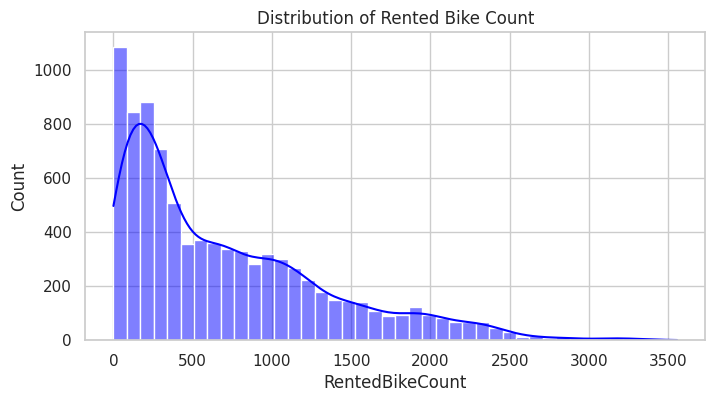

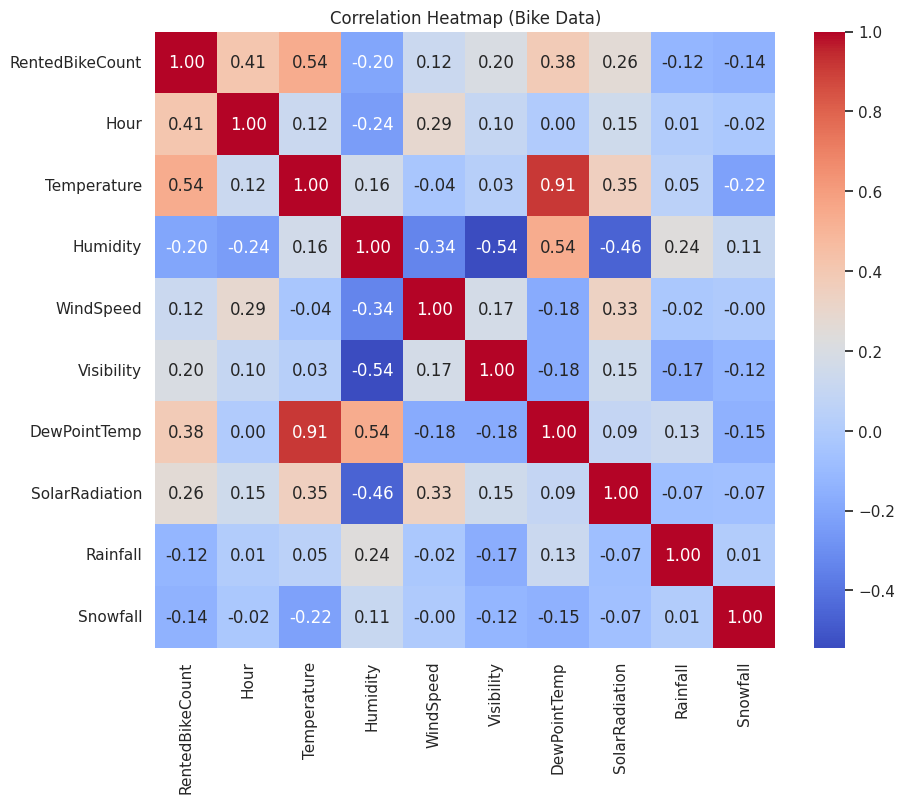

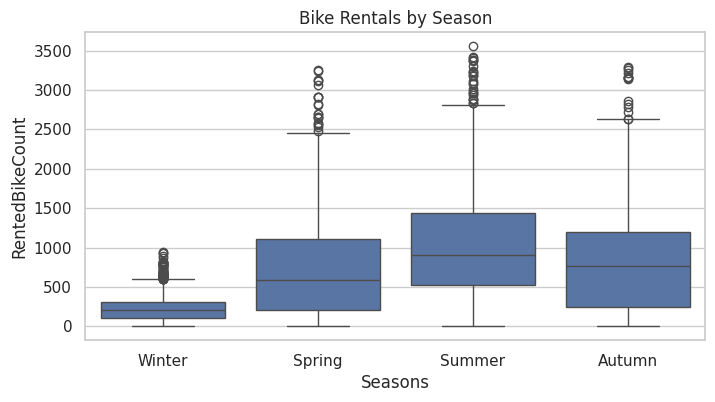

In [ ]:
# --- CELL 3: Regression EDA ---
# 1. Check for missing values
print("Missing Values:\n", df_bike.isnull().sum())

# 2. Distribution of Target Variable
plt.figure(figsize=(8, 4))
sns.histplot(df_bike['RentedBikeCount'], kde=True, color='blue')
plt.title('Distribution of Rented Bike Count')
plt.show()

# 3. Correlation Heatmap (Numerical features)
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df_bike.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Bike Data)')
plt.show()

# 4. Boxplot: Season vs Rentals
plt.figure(figsize=(8, 4))
sns.boxplot(x='Seasons', y='RentedBikeCount', data=df_bike)
plt.title('Bike Rentals by Season')
plt.show()

### 1.3 Data Preprocessing
Preparing the data for machine learning:
1. Dropping the `Date` column.
2. Encoding categorical variables (Seasons, Holiday, Functioning Day) using **OneHotEncoder**.
3. Scaling numerical variables using **StandardScaler** (crucial for Neural Networks).
4. Splitting data into 80% Training and 20% Testing sets.

In [ ]:
# --- CELL 4: Regression Preprocessing ---
# Define features (X) and target (y)
# We drop 'Date' and the target variable from X
X_reg = df_bike.drop(['Date', 'RentedBikeCount'], axis=1)
y_reg = df_bike['RentedBikeCount']

# Identify categorical and numerical columns
categorical_cols_reg = ['Seasons', 'Holiday', 'FunctioningDay']
numerical_cols_reg = [col for col in X_reg.columns if col not in categorical_cols_reg]

# Create a transformer pipeline
# Neural Networks require StandardScaler
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_reg),
        ('cat', OneHotEncoder(drop='first'), categorical_cols_reg)
    ])

# Split data: 80% Train, 20% Test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Apply transformations
X_train_reg_scaled = preprocessor_reg.fit_transform(X_train_reg)
X_test_reg_scaled = preprocessor_reg.transform(X_test_reg)

print("Data scaled and split for Regression.")

Data scaled and split for Regression.


### 1.4 Model Building
We will train three models to compare performance:
1. **Neural Network (MLPRegressor):** A deep learning approach.
2. **Linear Regression:** A baseline classical model.
3. **Random Forest Regressor:** An ensemble method.

In [ ]:
# --- CELL 5: Regression Model Training ---

# 1. Neural Network (MLP Regressor)
nn_reg = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
nn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_nn = nn_reg.predict(X_test_reg_scaled)

# 2. Linear Regression (Classical Model 1)
lr_reg = LinearRegression()
lr_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lr = lr_reg.predict(X_test_reg_scaled)

# 3. Random Forest (Classical Model 2)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg_scaled)

# Helper function to print results
def print_reg_metrics(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"[{name}] RMSE: {rmse:.2f} | R2 Score: {r2:.4f}")

print("--- Regression Model Results ---")
print_reg_metrics("Neural Network", y_test_reg, y_pred_nn)
print_reg_metrics("Linear Regression", y_test_reg, y_pred_lr)
print_reg_metrics("Random Forest", y_test_reg, y_pred_rf)

--- Regression Model Results ---
[Neural Network] RMSE: 316.38 | R2 Score: 0.7598
[Linear Regression] RMSE: 440.78 | R2 Score: 0.5337
[Random Forest] RMSE: 240.32 | R2 Score: 0.8614


### 1.5 Feature Selection & Hyperparameter Tuning
Optimizing the best performing model (Random Forest) by:
1. Selecting the top 10 most relevant features using `SelectKBest`.
2. Tuning hyperparameters (`n_estimators`, `max_depth`) using `GridSearchCV`.

In [ ]:
# --- CELL 6: Regression Tuning & Feature Selection ---

# A. Feature Selection: Select top 10 most important features
selector = SelectKBest(score_func=f_regression, k=10)
X_train_sel = selector.fit_transform(X_train_reg_scaled, y_train_reg)
X_test_sel = selector.transform(X_test_reg_scaled)

# Get selected feature names (optional visualization)
mask = selector.get_support()
new_features = np.array(preprocessor_reg.get_feature_names_out())[mask]
print("Selected Features:", new_features)

# B. Hyperparameter Tuning for Random Forest
# (Using a small grid to save time)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2]
}

grid_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')
grid_reg.fit(X_train_sel, y_train_reg)

best_rf_reg = grid_reg.best_estimator_
y_pred_final_reg = best_rf_reg.predict(X_test_sel)

print("\n--- Final Optimized Regression Model ---")
print("Best Params:", grid_reg.best_params_)
print_reg_metrics("Tuned Random Forest", y_test_reg, y_pred_final_reg)

Selected Features: ['num__Hour' 'num__Temperature' 'num__Humidity' 'num__Visibility'
 'num__DewPointTemp' 'num__SolarRadiation' 'num__Snowfall'
 'cat__Seasons_Summer' 'cat__Seasons_Winter' 'cat__FunctioningDay_Yes']

--- Final Optimized Regression Model ---
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 100}
[Tuned Random Forest] RMSE: 258.81 | R2 Score: 0.8392
